<a href="https://colab.research.google.com/github/pabloxD13/tecprog1_Pablo_Brito/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação do dataset e limpeza de dados

In [1]:
# Leitura do Dataset
import pandas as pd
import numpy as np

df_bilion = pd.read_csv('https://raw.githubusercontent.com/pabloxD13/tecprog1_trabalho_final/main/billionaire_list_20yrs.csv')

# Dropando as colunas Unnamed: 0 (coluna de índice), daily_income (não serão usadas na análise) e name_cleaned

df_bilion = df_bilion.drop([ 'Unnamed: 0', 'daily_income', 'name_cleaned', 'last_name'], axis = 1)

In [2]:
df_bilion.head(5)

,name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,state,headquarters,countries,annual_income,birth_year
0,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,1955
1,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,1955
2,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,1955
3,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,1955
4,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,1955


In [3]:
percentual_faltantes = df_bilion.isna().sum()/len(df_bilion)*100
print(f'{percentual_faltantes}')

name                      0.000000
age                       0.000000
gender                    3.374871
time                      0.000000
permanent_country        13.534392
company                   7.236732
main_industry             0.000000
wealth_source_details     3.099592
industry                  0.013906
state                    54.822927
headquarters             62.069592
countries                 0.000000
annual_income             0.000000
birth_year                0.000000
dtype: float64


In [4]:
# As colunas state e headquartes tem muitos dados faltantes pois são preenchidas apenas para empresas americanas, para melhorarmos nossa análise iremos dropar essas colunas.
df_bilion = df_bilion.drop(['state', 'headquarters'], axis = 1)

In [5]:
df_bilion.head(5)

,name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,countries,annual_income,birth_year
0,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955
1,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955
2,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955
3,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955
4,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955


In [6]:
# Iremos então remover os valores duplicados, mantendo apenas o primeiro valor
df_bilion = df_bilion.drop_duplicates(keep = 'first')

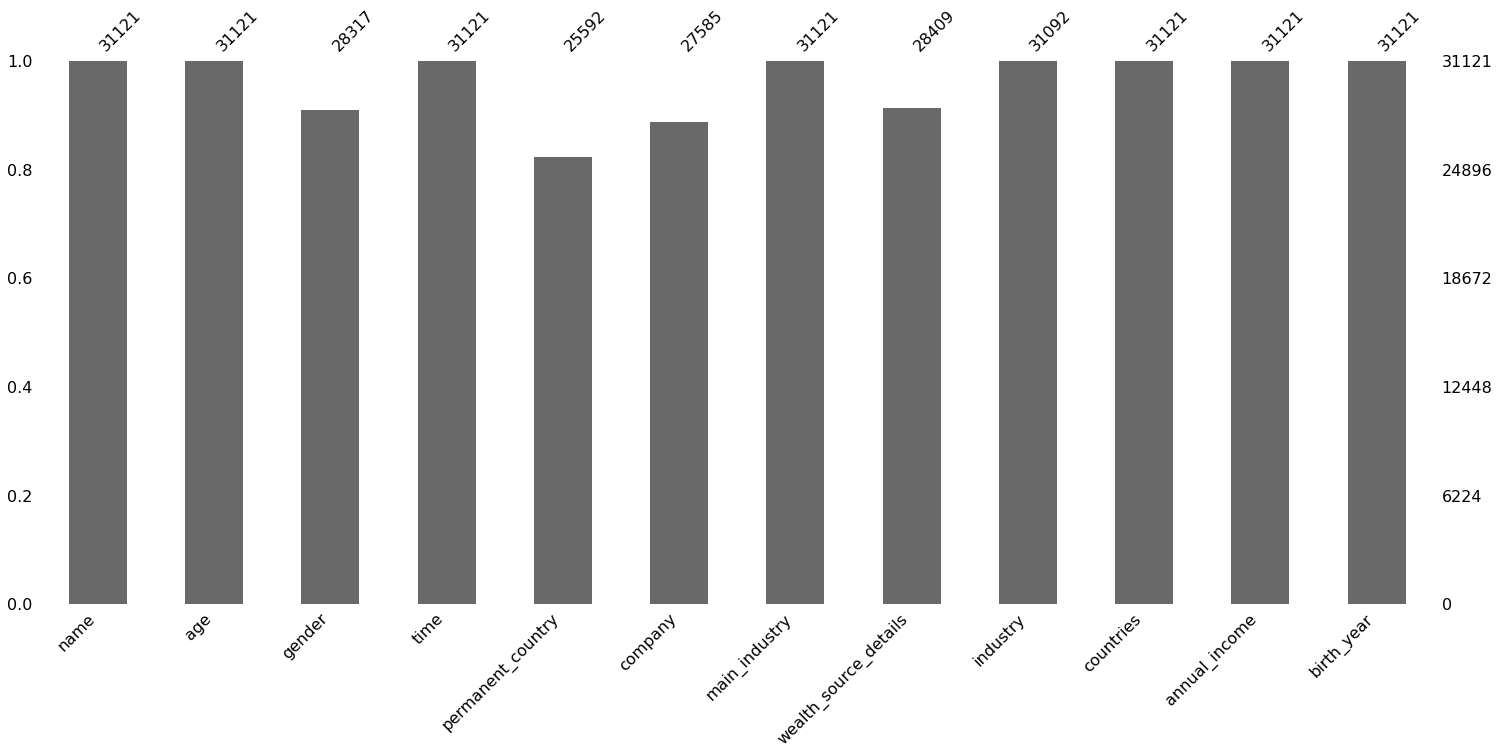

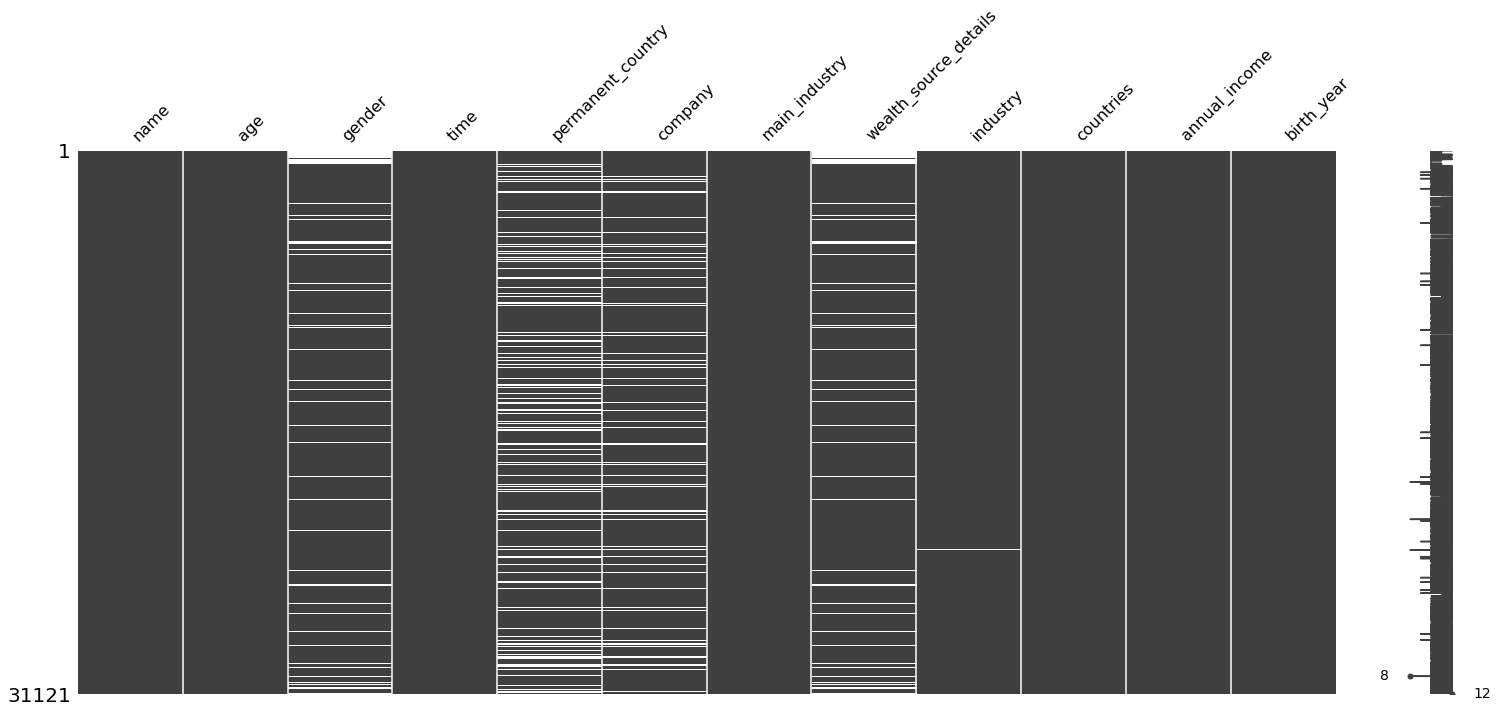

In [7]:
# Usando biblioteca missingno para plotar os valores faltantes
import missingno as msno
msno.bar(df_bilion)
msno.matrix(df_bilion)

In [8]:
# Separando os países de residência de cada bilionário criando a coluna country
df_bilion['country'] = df_bilion['permanent_country'].str.split('-', expand=True)[0]
df_bilion = df_bilion.drop(['permanent_country'], axis=1)
df_bilion.head(5)

,name,age,gender,time,company,main_industry,wealth_source_details,industry,countries,annual_income,birth_year,country
0,Abdulla bin Ahmad Al Ghurair,67,M,2013,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955,United Arab Emirates
10,Abdulla bin Ahmad Al Ghurair,67,M,2014,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,145728000,1955,United Arab Emirates
20,Abdulla bin Ahmad Al Ghurair,67,M,2015,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,195647999,1955,United Arab Emirates
30,Abdulla bin Ahmad Al Ghurair,67,M,2016,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,149793000,1955,United Arab Emirates
40,Abdulla bin Ahmad Al Ghurair,67,M,2017,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,204000000,1955,United Arab Emirates


In [9]:
df_bilion.isna().sum()

name                        0
age                         0
gender                   2804
time                        0
company                  3536
main_industry               0
wealth_source_details    2712
industry                   29
countries                   0
annual_income               0
birth_year                  0
country                  5529
dtype: int64

In [10]:
# Alguns dados faltantes da coluna country serão preenchidos através da coluna countries para os países que estão preenchidos como usa
country = 'usa'
filtered_df = df_bilion.loc[df_bilion['countries'] == country]
grouped = filtered_df.groupby(['country']).size().reset_index(name='counts')
print(grouped)


          country  counts
0             USA     653
1            USA        3
2   United States    7037
3  United States        6


In [11]:
filtered_df['country'].isna().sum()

1630

In [12]:
df_bilion.loc[df_bilion['countries'] == 'usa', 'country'] = 'United States'

In [13]:
# Existe duplicidade no nomes dos países na coluna country
df_bilion.loc[df_bilion['country'] == 'USA', 'country'] = 'United States'

In [14]:
# Serão excluídas as demais linhas com NaN
df_bilion.dropna(inplace=True)

In [15]:
# Excluindo o genero M;F e dropando a coluna countries
df_bilion = df_bilion[(df_bilion['gender']!='M;F')]
df_bilion = df_bilion.drop(['countries'], axis=1)

In [16]:
# Será criada uma nova coluna onde são filtradas as pessoas pela sua renda anual, de menos que 50 mi, entre 50 mi e 1 bi e mais que 1 bi
df_bilion[['name', 'time','annual_income']]
df_bilion['Range'] = ['< 50mi' if x <= 5*10**7 else 'between 50m and 1bi' if (x > 5*10**7) and (x <= 1*10**9) else '> 1bi' for x in df_bilion['annual_income']]

In [17]:
df_bilion.groupby('Range')['name'].count()

Range
< 50mi                  7630
> 1bi                    232
between 50m and 1bi    15512
Name: name, dtype: int64

In [18]:
df_bilion.head(5)

,name,age,gender,time,company,main_industry,wealth_source_details,industry,annual_income,birth_year,country,Range
0,Abdulla bin Ahmad Al Ghurair,67,M,2013,Mashreq Bank,Diversified,diversified,Diversified;Banking,95604000,1955,United Arab Emirates,between 50m and 1bi
10,Abdulla bin Ahmad Al Ghurair,67,M,2014,Mashreq Bank,Diversified,diversified,Diversified;Banking,145728000,1955,United Arab Emirates,between 50m and 1bi
20,Abdulla bin Ahmad Al Ghurair,67,M,2015,Mashreq Bank,Diversified,diversified,Diversified;Banking,195647999,1955,United Arab Emirates,between 50m and 1bi
30,Abdulla bin Ahmad Al Ghurair,67,M,2016,Mashreq Bank,Diversified,diversified,Diversified;Banking,149793000,1955,United Arab Emirates,between 50m and 1bi
40,Abdulla bin Ahmad Al Ghurair,67,M,2017,Mashreq Bank,Diversified,diversified,Diversified;Banking,204000000,1955,United Arab Emirates,between 50m and 1bi


In [19]:
df_bilion.to_csv('df_bilion.csv')

# Importando as bibliotecas e iniciando a visualização de dados

In [20]:
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp

## Plotando o crescimento anual dos 5 países com maior annual income



In [21]:
# Selecionando os 5 países com maior renda em 2022 e criando um dataframe
country_2022 = df_bilion[df_bilion['time'] == 2022]
top_5 = list(country_2022.groupby('country')['annual_income'].sum().sort_values(ascending = False).index[:5])
top_countries = df_bilion[df_bilion['country'].isin(top_5)]

In [22]:
top_countries.groupby('country')['annual_income'].sum().sort_values(ascending = False)

country
United States    1191522569086
China             340995253513
Germany           129813589377
India             109610972921
France             82450859956
Name: annual_income, dtype: int64

In [23]:
# Fazendo a agregação do annual_income
top_countries_ag = top_countries.groupby(['country', 'time'])['annual_income'].agg({'count', 'sum'}).reset_index()

In [24]:
top_countries_ag.rename(columns={"sum": "annual_income"}, inplace=True)

In [25]:
top_countries_ag

,country,time,annual_income,count
0,China,2002,1322025600,10
1,China,2003,911671196,7
2,China,2004,1336383600,9
3,China,2005,1401371997,8
4,China,2006,1928837995,14
...,...,...,...,...
100,United States,2018,86396940000,555
101,United States,2019,84497820000,565
102,United States,2020,77751513000,555
103,United States,2021,110180400000,635


In [26]:
fig = px.line(top_countries_ag, x="time", y="annual_income", color='country', 
              markers=True, width=1300, height=700)
fig.update_layout(title={"text":"Top 5 countries and the evolution of their annual income by year",
                         "x":0.5, 
                         "xanchor":"center", 
                         "yanchor":"top"})
fig.show()

Principais conclusões a partir dos gráficos.

*   Crise de 2008 afetou os países. Estados unidos teve uma perda de aproximadamente 11 bilhões de dólares em renda anual;
*   Devido a pandemia foi possível observar que os bilionários ficaram mais ricos entre 2020 e 2022. Fonte: https://www.cnnbrasil.com.br/business/1-mais-rico-acumulou-duas-vezes-mais-riqueza-do-que-resto-do-mundo-em-2-anos/#:~:text=Sua%20fortuna%20aumentou%20US%24%2026,ricos%20acelerou%20durante%20a%20pandemia;
*   A renda anual dos bilionários Chineses cresceu em maior proporção que dos outros países.



## Plotando o crescimento por gênero

In [27]:
# Agregando os valores por gênero ao longo da linha do tempo
gender_ag = df_bilion.groupby(['gender', 'time'])['annual_income'].agg({'sum'}).reset_index()
gender_ag.rename(columns={"sum": "annual_income"}, inplace=True)

In [28]:
gender = pd.pivot_table(df_bilion, index = 'time', columns = 'gender', 
                        values = 'annual_income', aggfunc = {'count'})
gender.columns = ['Female_Count', 'Male_Count']

In [29]:
# Realizando a análise através do crescimento percentual por gênero
gender['Female_percent'] = gender['Female_Count']/gender.loc[2002, 'Female_Count']*100
gender['Male_percent'] = gender['Male_Count']/gender.loc[2002, 'Male_Count']*100
gender = gender.reset_index()

In [30]:
gender.head(5)

,time,Female_Count,Male_Count,Female_percent,Male_percent
0,2002,23,244,100.000000,100.000000
1,2003,24,242,104.347826,99.180328
2,2004,33,306,143.478261,125.409836
3,2005,43,378,186.956522,154.918033
4,2006,49,449,213.043478,184.016393


In [31]:
fig = px.line(gender_ag, x="time", y="annual_income", color='gender', markers=True, width=1000, height=500 )
fig.update_layout(title={"text":"Annual income by gender",
                         "x":0.5, 
                         "xanchor":"center", 
                         "yanchor":"top"})
fig.show()

In [32]:
fig = px.line(gender, x="time", y=["Male_percent","Female_percent"], markers=True, width=1000, height=500)
fig.update_layout(title={"text":"Percentage change in number of bilionaires by gender",
                         "x":0.5, 
                         "xanchor":"center", 
                         "yanchor":"top"})
fig.show()

Através desses dois gráficos é possível tirar a seguinte conclusão:


*   A renda anual dos homens bilionários aumentou consideravelmente ao longo do tempo (de 33 para 259 bi);
*   Por mais que a renda das mulheres não tivesse aumentado tanto quanto dos homens, o número de mulheres bilionárias em percentual cresceu mais que o dos homens.




## Plotando a distribuição da renda anual por indústria

In [33]:
top_10_industries = list(df_bilion['main_industry'].value_counts().index[:10])
industry_filter = df_bilion[df_bilion['main_industry'].isin(top_10_industries)]
grouped_indust = pd.pivot_table(industry_filter, index = 'time', columns = 'main_industry', values = 'annual_income', aggfunc = 'sum')
grouped_indust = grouped_indust.T
group_indust = grouped_indust.reset_index(inplace=True)
grouped_indust

time,main_industry,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Diversified,2883909000,2969837994,4237050000,5030297989,6608753977,8517267000,11668833000,5868150000,8653812000,...,13057656000,14223660000,15429596033,14092769938,17451000000,20198250000,19531215000,15053472000,20856000000,22644660000
1,Energy,998739000,1131914997,1453218000,1913813995,3052565990,4164831000,5516115000,3067968000,4549470000,...,8397732000,9874590000,9372761947,6991358954,8700000000,8637975000,8813310000,6715191000,9448560000,9257040000
2,Fashion & Retail,6574029000,5586671992,7107426000,7850471993,8842505969,10973187000,12045462000,8631966000,12682875000,...,20983536000,25972980000,28471369386,25379213895,26676000000,30890430000,29856420000,28181244000,41371440000,38792880000
3,Finance & Investments,5469399600,4902151189,6211695600,7365917986,8797967946,12651399000,17241609000,9964284000,14918334000,...,20508600000,23638296000,25619188348,24712787847,28056000000,30076770000,29474940000,27012069000,36490608000,39188652000
4,Food & Beverage,1576323000,1630724999,1759728000,2119487995,2305697987,2872062000,3273006000,2644800000,4140345000,...,8348388000,9759222000,12973907926,13019762914,14835000000,17751540000,16858050000,15554154000,21703440000,19934370000
5,Healthcare,537474000,372188999,562536000,801779997,931871990,1306413000,1789821000,1514148000,2061990000,...,3094794000,4742232000,7014286452,7795349936,8640000000,9924360000,9567855000,10495065000,17569200000,16130160000
6,Manufacturing,1006761000,894020998,1143102000,1718597998,2048747984,3090366000,4496217000,2542314000,4451280000,...,6450186000,8368734000,9357476925,9800741927,12198000000,15241800000,13506075000,13133274000,24269520000,23963040000
7,Media & Entertainment,3112536000,2916119996,3533880000,3548747996,3672671978,5130144000,5606106000,3788676000,5030601000,...,7145628000,8468922000,9053305449,9103745959,10344000000,9921495000,9767010000,8396052000,12951840000,12069240000
8,Real Estate,1271487000,1231676999,1579428000,1955645995,2874413983,4383135000,6279372000,4026708000,5704839000,...,8963646000,9215778000,11501962424,11625770923,14079000000,16754520000,16468155000,13378113000,16513200000,14244180000
9,Technology,7336119000,5275874996,6555708000,7156757991,8359439979,9250632000,9962337000,6483066000,9812454000,...,13803984000,18529922398,22716566899,22930556908,27924000000,32915985000,33424380000,33815292000,57000240000,51623219999


In [34]:
labels = list(grouped_indust['main_industry'].unique())

In [35]:
# Iremos criar um plot comparando as 10 principais indústrias e como estão distribuido seus percentuais de bilionários nos anos de 2002 e de 2022
import plotly.graph_objects as go
import plotly.subplots as sp

In [36]:
print(grouped_indust.columns)

Index(['main_industry',            2002,            2003,            2004,
                  2005,            2006,            2007,            2008,
                  2009,            2010,            2011,            2012,
                  2013,            2014,            2015,            2016,
                  2017,            2018,            2019,            2020,
                  2021,            2022],
      dtype='object', name='time')


In [37]:
grouped_indust['total_2002'] = np.round(grouped_indust[2002].sum()/1000000000,1)
grouped_indust['total_2022'] = np.round(grouped_indust[2022].sum()/1000000000,1)

In [38]:
fig = sp.make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Wealth Allocation in 2002 in $B',
                                    'Wealth Allocation in 2022 in $B'])
fig.add_trace(go.Pie(labels=labels, values=grouped_indust[2002],
                     name="Wealth Allocation in 2002", ), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=grouped_indust[2022],
                     name="Wealth Allocation in 2022"), 1, 2)
fig.update_layout(title_text='Total amount of Income on Industries and their Distribution in 2002 and 2022',
                  title_x = 0.5,
                  legend=dict(orientation="h", x = 0.1), title_pad_b = 10)
fig.update_layout(width=1000, height=500)

fig.update_traces(textposition = 'inside',textinfo='label+percent',
                  insidetextorientation='radial',
                  hovertemplate = 'Dollars: %{value:$.3s}')

Fazendo algumas análises:

*   No ano de 2002 a indúsrtia fashion era a segunda maior responsável pela produção de bilionários com 21,4%;
*   A indústria de Healthcare teve uma alta de 1,75% para 6,51%, a pandemia do COVID 19 pode ter contribuido ativamente para essa alta;
*   Houve crescimento na indústria de manufatura e de alimentos, a população do mundo cresceu em 1,5 bilhões de pessoas, isso pode explicar um aumento nessas áreas também.
